# What factors affect Airbnb Prices in Paris on Weekends?


## Inrtoduction 

Airbnbs have specific attributes (room type, cleanliness rating, superhost status etc.) that determine its price and perceived quality. Guests evaluate the quality through an online/digital rating system. Attributes of Parisian Airbnbs have been identified and collected into a data set on Kaggle. Utilization of this data allows us to analyze trends in Airbnb prices and popularity across different cities and neighborhoods and identify factors that may influence prices and demand. The data set includes 19 variables in each respective column, with each row documenting an Airbnb's price. 

For details of data set, reference it [here](https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?select=paris_weekends.csv ).

The following are the potential predictor variables including their description: 

| Variable | Description | Type |
| --- | --- | --- |
| realSum | The total price of the Airbnb listing. | Numeric |
| room_type | The type of room being offered (e.g. private, shared, etc.). | Categorical |
| room_shared | Whether the room is shared or not. | Boolean |
| room_private | Whether the room is private or not. | Boolean |
| person_capacity | The maximum number of people that can stay in the room. | Numeric |
| host_is_superhost | Whether the host is a superhost or not. | Boolean |
| multi | Whether the listing is for multiple rooms or not. | Boolean |
| biz | Whether the listing is for business purposes or not. | Boolean |
| cleanliness_rating | The cleanliness rating of the listing. | Numeric |
| guest_satisfaction_overall | The overall guest satisfaction rating of the listing. | Numeric |
| bedrooms | The number of bedrooms in the listing. | Numeric |
| dist | The distance from the city centre. | Numeric |
| metro_dist | The distance from the nearest metro station. | Numeric |
| lng | The longitude of the listing. | Numeric |
| lat | The latitude of the listing. | Numeric |

This project will take this data and attempt to answer the question: *What factors affect Airbnb Prices in Paris on Weekends?*





## Preliminary exploratory data analysis

##### The preliminary exploratory data analysis will include:
- Reading dataset from web link
- Cleaning and wrangling data into a tidy format
- Splitting into training data and test data
- Statistics of training subset
- Visualizing training data comparing distributions of predictor variables

In [1]:
# load the necessary libraries
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)
library(gridExtra)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### Reading from web link
Read the data frame from our GitHub repository

In [2]:
# Source: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?select=paris_weekends.csv

# This code reads the "paris_weekends.csv" file from our GitHub repository and stores it in a data frame called "paris_data_weekends".
paris_data_url <- "https://raw.githubusercontent.com/kairavv/dsci-100-2022w2-group-17/728ea69b13f24e3d7056c5b072d33309ea0a85de/data/paris_weekends.csv"
paris_data <- read.csv(paris_data_url)

# It then displays the data
paris_data 

X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,536.3967,Entire home/apt,False,False,5,False,0,1,9,89,1,1.3512012,0.2123455,390.7768,19.00155,1030.739,47.55037,2.35900,48.86800
1,290.1016,Private room,False,True,2,True,0,0,10,97,1,0.6998212,0.1937103,518.4783,25.21104,1218.659,56.21958,2.35385,48.86282
2,445.7545,Entire home/apt,False,False,4,False,0,1,10,100,1,0.9689817,0.2943429,432.6899,21.03958,1069.895,49.35674,2.36023,48.86375
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3555,223.9258,Entire home/apt,False,False,2,False,1,0,9,89,1,4.205205,0.2530289,172.6589,8.395552,406.5859,18.75676,2.40100,48.87700
3556,200.8575,Entire home/apt,False,False,2,True,0,0,9,93,1,2.891214,0.2406744,235.1679,11.435057,602.4517,27.79250,2.38200,48.87400
3557,301.2862,Entire home/apt,False,False,2,False,0,0,10,92,1,3.469749,0.5085167,200.6376,9.756019,478.9904,22.09694,2.39992,48.85886


#### Cleaning and Wrangling
After the data is read, the variable are filtered as per our requirements

Additionally, the quality variable is converted to a factor type, as it is a discrete variable.

In [3]:
# Cleaning the data, removing irrelevant or unnecessary variables to ensure that the data is in a consistent format.

# Variables filtered out: X (unique identifier), lng (The longitude of the listing), lat (The latitude of the listing).

# Variables to be utilized:
new_paris_data <- paris_data |>
  select(realSum,                     
         person_capacity,
         cleanliness_rating,
         guest_satisfaction_overall,
         bedrooms,
         dist,
         metro_dist)

# Displaying the cleaned data
new_paris_data 

realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
536.3967,5,9,89,1,1.3512012,0.2123455
290.1016,2,10,97,1,0.6998212,0.1937103
445.7545,4,10,100,1,0.9689817,0.2943429
⋮,⋮,⋮,⋮,⋮,⋮,⋮
223.9258,2,9,89,1,4.205205,0.2530289
200.8575,2,9,93,1,2.891214,0.2406744
301.2862,2,10,92,1,3.469749,0.5085167


#### Splitting
Splitting the data involves some form of randomness, thus a seed is set for consistency.

The data is split with `SPLIT_PROPORTION` and strata `realSum`.

In [4]:
# 3557 total examples
# Split dataset into 75% training and 25% testing

# set seed for consistency
set.seed(8888)

# splitting data set into training and testing subsets
SPLIT_PROPORTION = 0.75
paris_split <- initial_split(new_paris_data, prop = 0.75, strata = realSum) 

paris_train <- training(paris_split)
paris_test <- testing(paris_split)

# Table and Counts: count the number of observations in each subset
paste("Number of observations in training data subset: ", pull(count(paris_train)))
paste("Number of observations in testing data subset: ", pull(count(paris_test)))

[1] "Number of observations in training data subset:  2667"

[1] "Number of observations in testing data subset:  891"

#### Statistics of training data subset
Some statistics include number of `null` and `N/A`, and the min, mean, max, standard deviation.

<sub>Note: rules of tidy data do not apply to visual representation of statistics.</sub>

In [5]:
# Check for null and N/A data
paste("Number of null values: ", sum(map_df(paris_train, is.null)))
paste("Number of N/A values: ", sum(map_df(paris_train, is.na)))

# Produce summary statistics of the training data, not used as it is difficult to read
# summary(paris_train)

# Abstract function for reducing repetitive code (template)
my_map <- function(fn) {
    paris_train |>
    select(-person_capacity) |>
    # apply function from parameter into map function
    map_df(fn) |>
    # pivot for better view
    pivot_longer(cols = c(realSum, cleanliness_rating:metro_dist), values_to = as.character(substitute(fn)), names_to = "variable")
}

# combine all the statistical summaries, but exclude the variable column from all except the first one.
bind_cols(my_map(min), select(my_map(mean), mean), select(my_map(max), max), select(my_map(sd), sd))

[1] "Number of null values:  0"

[1] "Number of N/A values:  0"

variable,min,mean,max,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
realSum,96.467517942,388.7221479,4188.414577,270.7090592
cleanliness_rating,2.000000000,9.2845894,10.000000,0.9342601
guest_satisfaction_overall,20.000000000,92.2669666,100.000000,8.4437577
bedrooms,0.000000000,0.9782527,4.000000,0.6466309
dist,0.139543184,2.9751175,7.703733,1.4541902
metro_dist,0.003220008,0.2263965,1.045836,0.1196413


Based on the analysis above, there isn't any invalid or missing values in the dataset. Therefore, no further data wrangling is necessary at this stage.
#### Visualization of training data subset

The last part involves plots that are relevant to the objective.
The first plot is a distribution of the `realSum` class variable (in defined ranges).

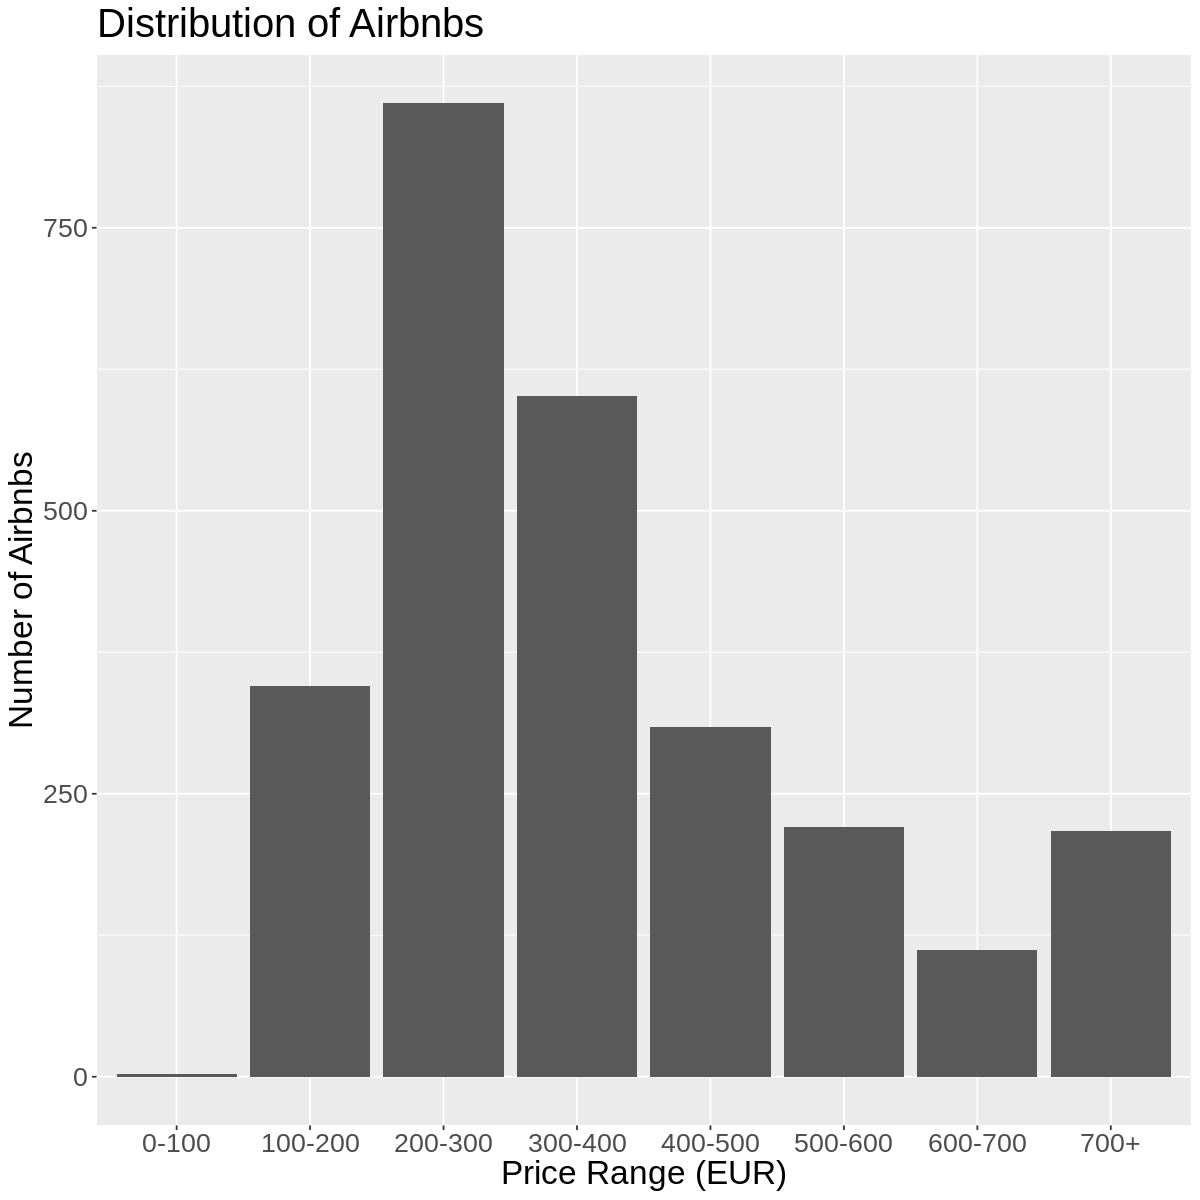

In [6]:
options(repr.plot.width = 10, repr.plot.height = 10)

# define the breakpoints for the realSum column
breaks <- c(0, 100, 200, 300, 400, 500, 600, 700, Inf)

# create a new column with the ranges
paris_train$realSumRange <- cut(paris_train$realSum, breaks = breaks, include.lowest = TRUE)

# plotting the distribution of Airbnbs throught Paris, based on the price range
# create a histogram with ggplot2
paris_graph_freq <- ggplot(paris_train, aes(x = realSumRange)) +
    geom_bar() +
    labs(x = "Price Range (EUR)", y = "Number of Airbnbs") + 
    ggtitle("Distribution of Airbnbs") +
    theme(text = element_text(size = 20)) +
    scale_x_discrete(labels = c("0-100", "100-200", "200-300", "300-400", "400-500", "500-600", "600-700", "700+"))
paris_graph_freq

From the plot above, it can be seen that the `realSum` variable is (somewhat) normally distributed with the center 200-300. 

Second plot is comparing the distribution of the potential predictor variables. The data is normalized with `scale()` and plotted as histograms with `facet_wrap()` for appropriate visual comparison. Outliers are removed to improve the visualization.

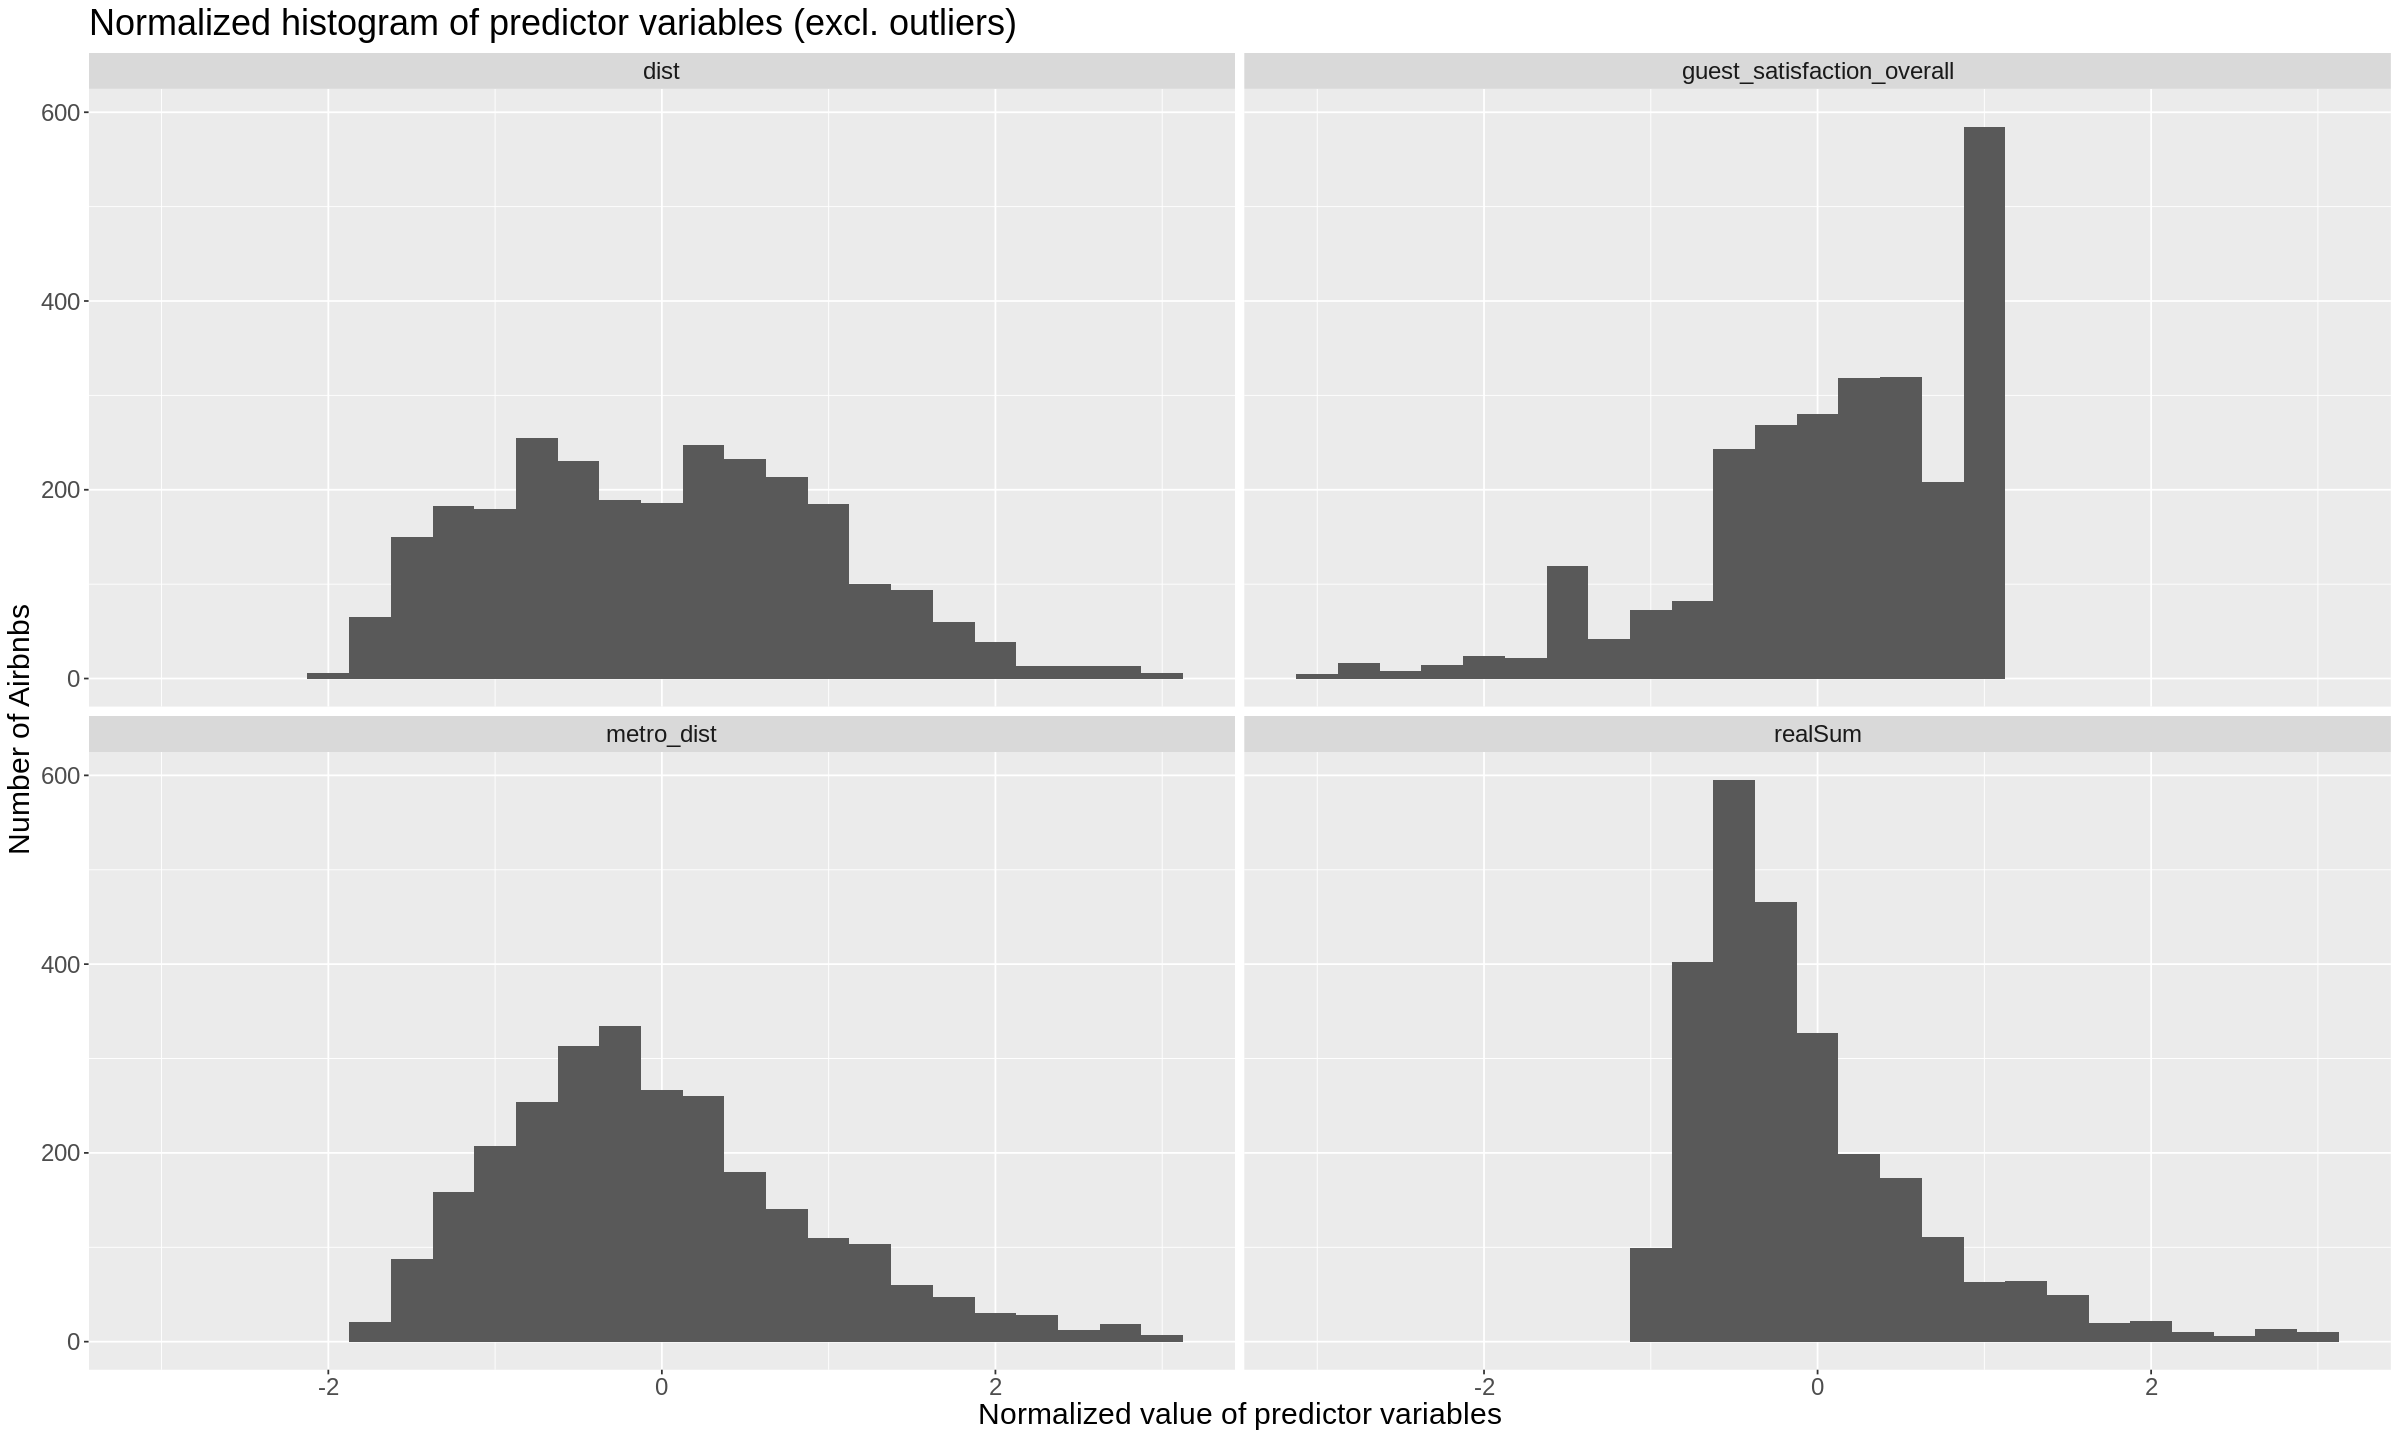

In [7]:
options(repr.plot.width = 20, repr.plot.height = 12)

#normalize the data with respect to each predictor variable
paris_train_normalized <- paris_train |>
  select(realSum, guest_satisfaction_overall, dist, metro_dist) |>
  scale() %>%
  as.data.frame()

paris_train_longer <- pivot_longer(paris_train_normalized, cols = realSum:metro_dist, names_to = "variable", values_to = "value")

# define binwidth constant
PREDICTOR_BINWIDTH <- 0.25

# code to plot without excluding outliers
# paris_predictor_histogram <- ggplot(paris_training_normalized_longer, aes(x = value)) + 
#     geom_histogram(binwidth = PREDICTOR_BINWIDTH) +
#     facet_grid(rows = vars(variable)) +
#     ggtitle("Normalized histogram of predictor variables") +
#     labs(x = "Normalized value of predictor variables", y = "Number of Airbnbs") + 
#     theme(text = element_text(size = 18))

# remove outliers that are outside of 3 standard deviations
paris_train_normalized_longer_eo <- filter(paris_train_longer, value < 3 & value > -3)

paris_predictor_histogram_eo <- ggplot(paris_train_normalized_longer_eo, aes(x = value)) + 
    geom_histogram(binwidth = PREDICTOR_BINWIDTH) +
    facet_wrap(vars(variable)) +
    ggtitle("Normalized histogram of predictor variables (excl. outliers)") +
    labs(x = "Normalized value of predictor variables", y = "Number of Airbnbs") + 
    theme(text = element_text(size = 18))

paris_predictor_histogram_eo

From the second plot, it can be seen that some of the predictor variable distributions tend to be positively skewed and some distributions are taller than others.

The third plot will involve `ggpairs()` from the `GGally` extension of `ggplot2`, which creates a scatter plot matrix with correlation coefficients that allows visualizations of relationships between predictor variables. For this visualization, `realSumRange` is removed from the dataset as it is not relevant to the analysis being performed here, it was already explored in a separate analysis above.

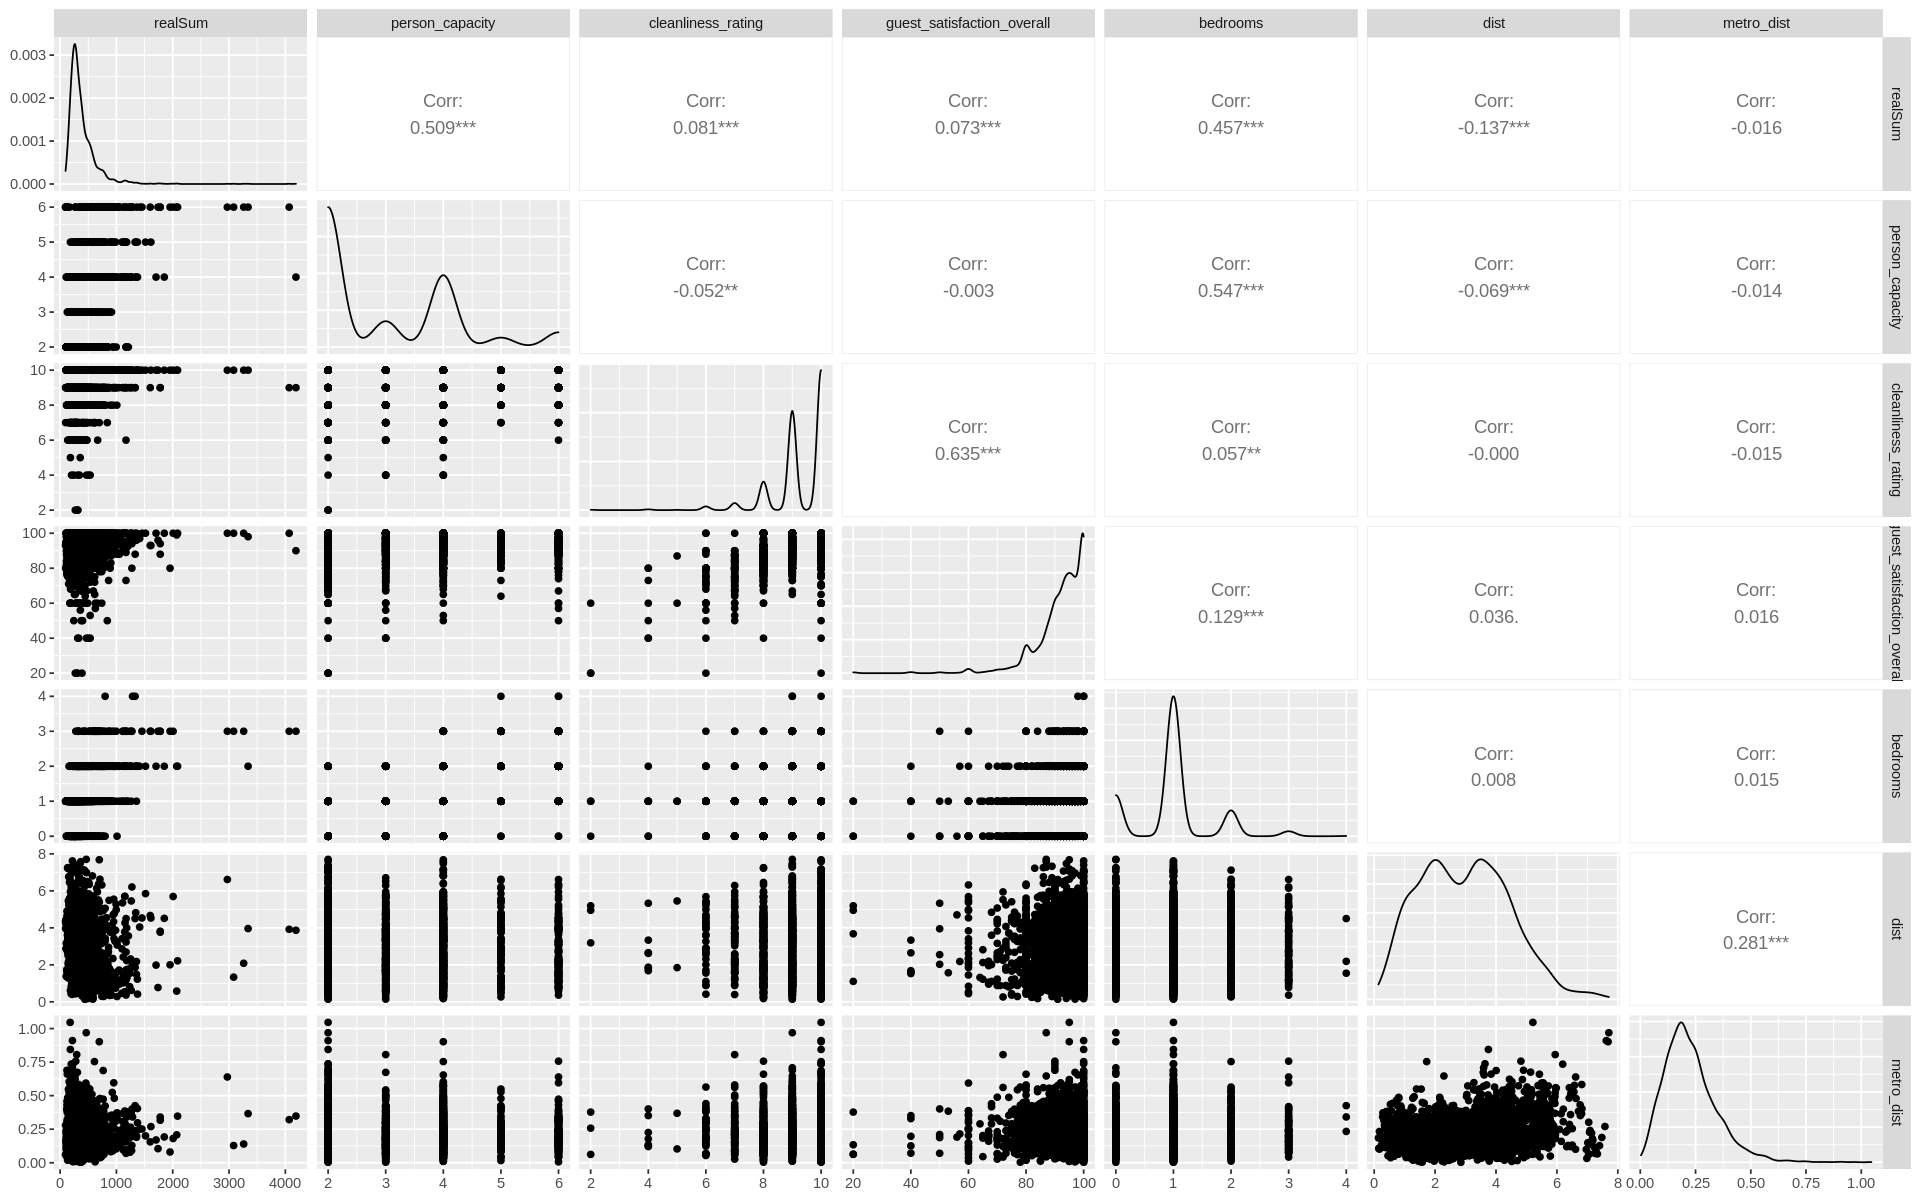

In [8]:
options(repr.plot.width = 16, repr.plot.height = 10)
paris_train |>
  select(-realSumRange) |>
  ggpairs()

From the plot above, the correlation coefficient between variables can be seen along with the scatterplot.

Below is an example scatter plot to explore the two predictor variables that have relatively highest correlation with each other. In the first plot, distance from the city center vs. listing price is used for axes, and the `realSumRange` variable as the color. The data used in this scatter plot is not normalized.

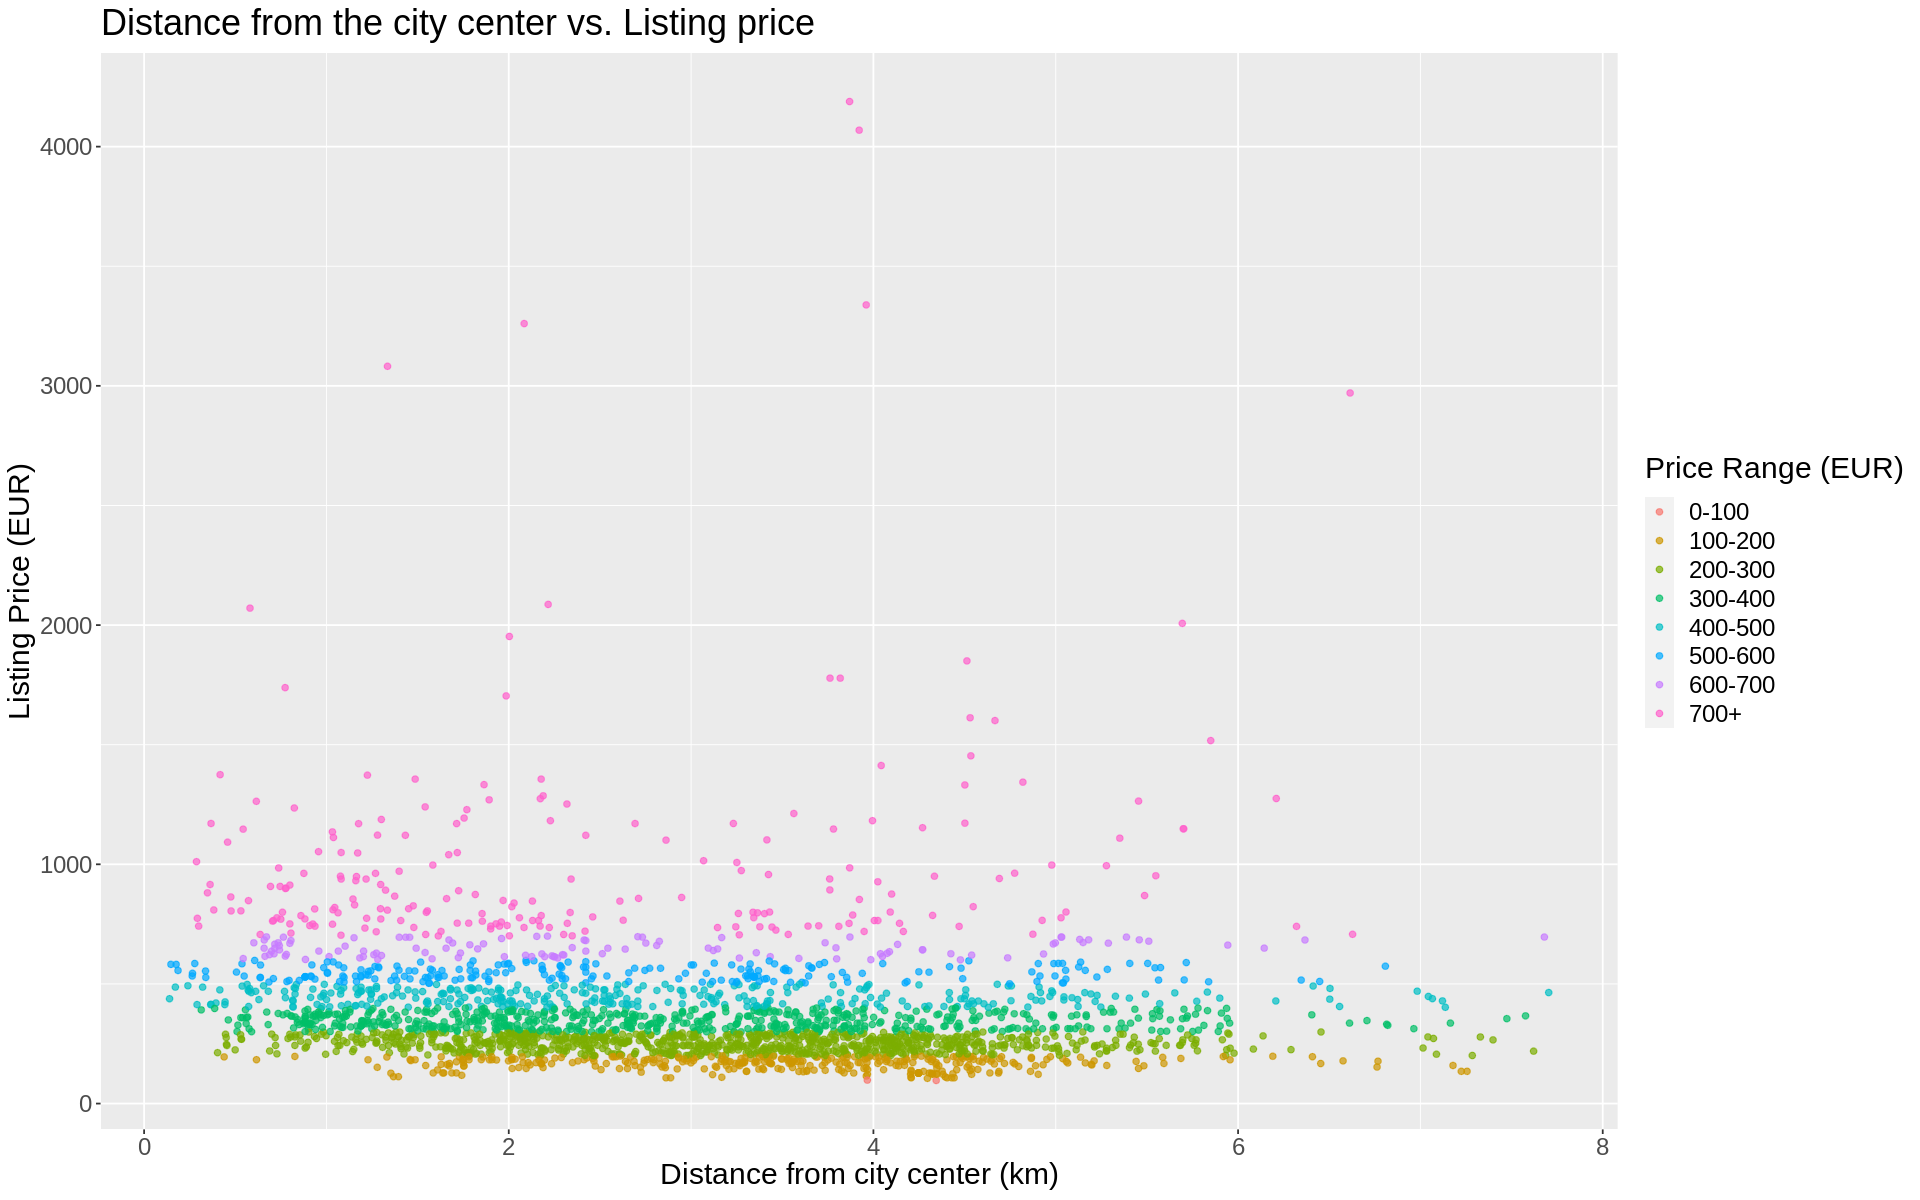

In [9]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(paris_train, aes(x = dist, y = realSum, color = cut(realSum, breaks = c(0,100,200,300,400,500,600,700, Inf), labels = c("0-100", "100-200", "200-300", "300-400", "400-500", "500-600", "600-700", "700+")))) +
  geom_point(alpha = 0.7) +
  ggtitle("Distance from the city center vs. Listing price") +
  labs(x = "Distance from city center (km)", y = "Listing Price (EUR)", color = "Price Range (EUR)") + 
  theme(text = element_text(size = 18))

This example shows that an increase in the distance from the city center generally results in a decrease in the listing price of the Airbnb. This is evident from the majority of scatter points being clustered towards the left-hand side of the plot.

The next scatter plot explores the relationship between two predictor variables, the distance from the city center and the listing price, while also using the realSumRange variable to indicate the color. The data used in this scatter plot is not normalized.

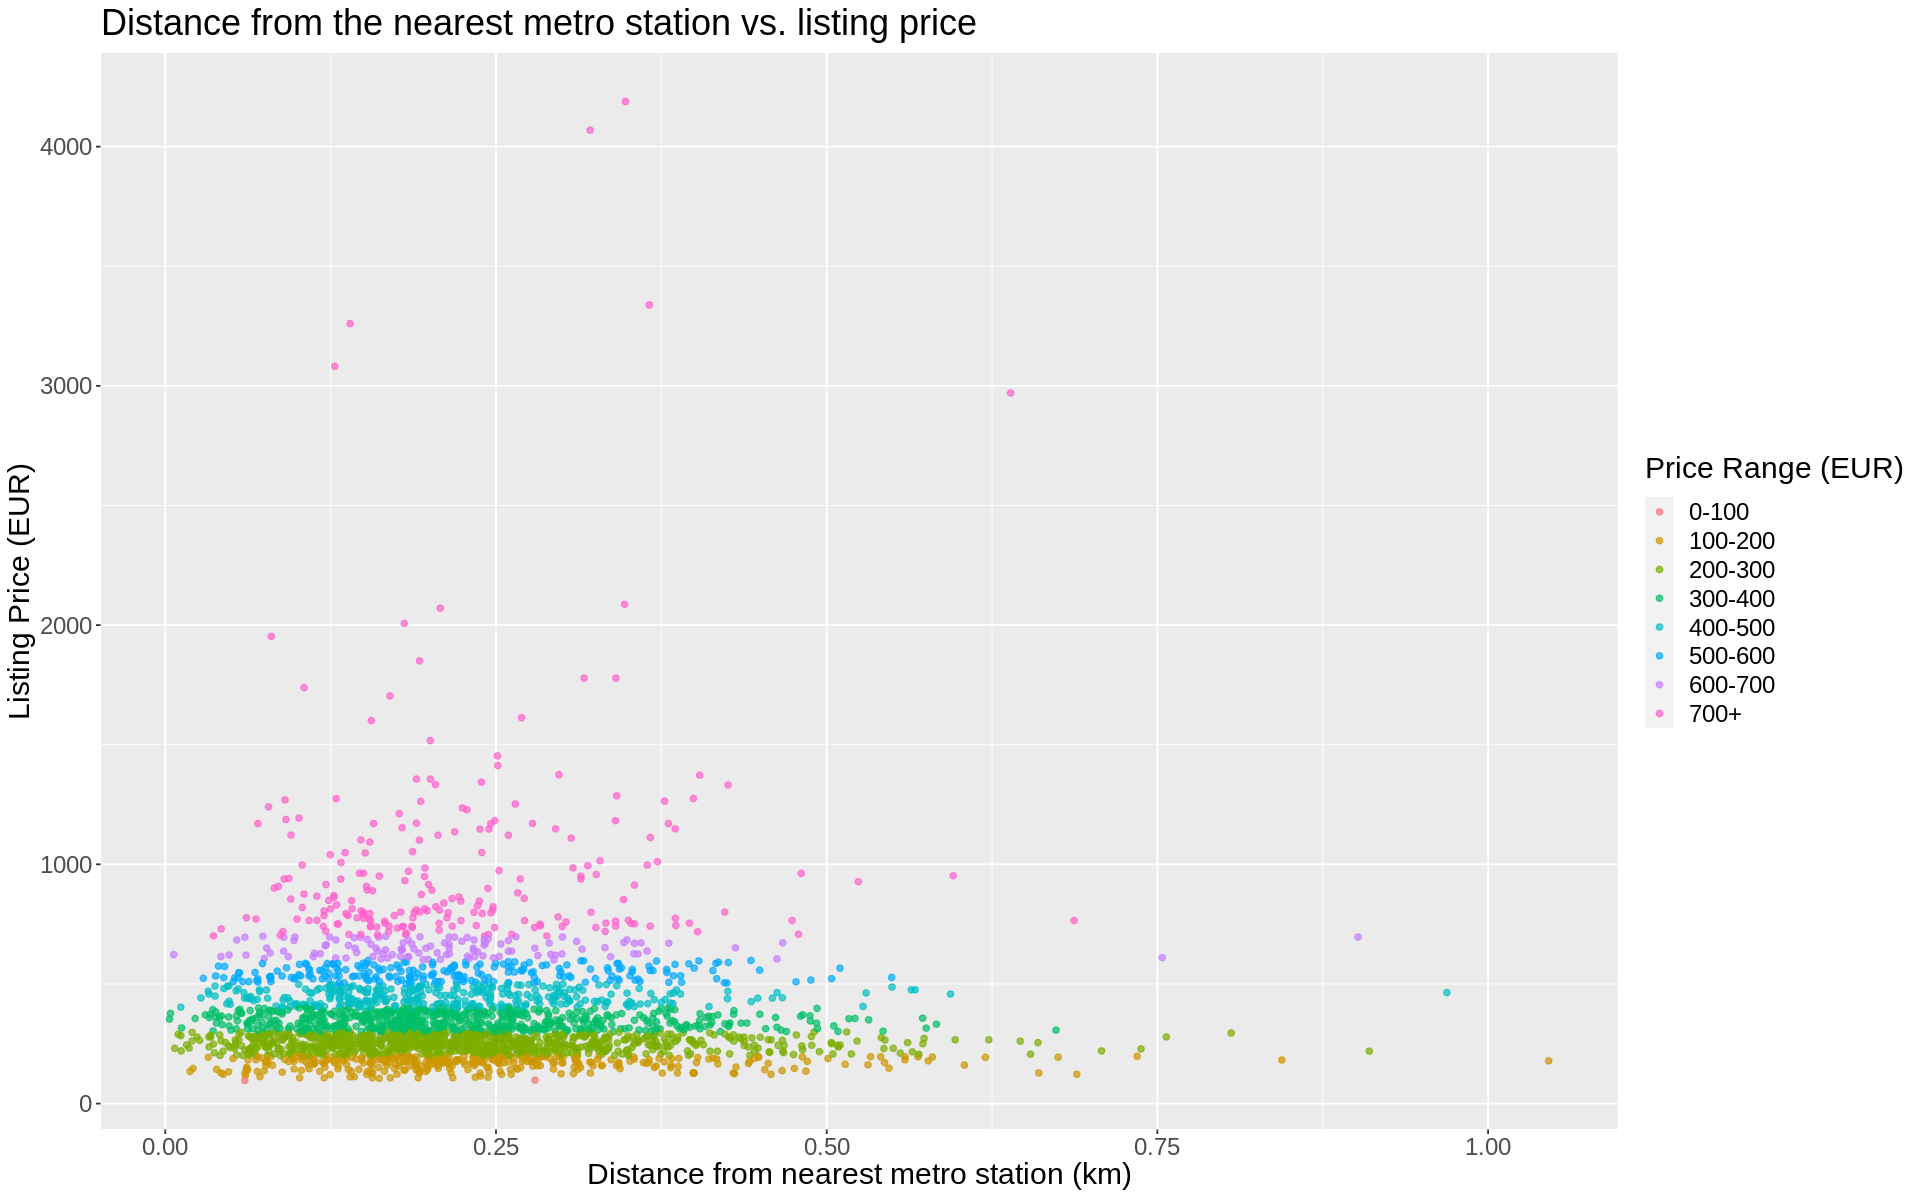

In [10]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(paris_train, aes(x = metro_dist, y = realSum, color = cut(realSum, breaks = c(0,100,200,300,400,500,600,700, Inf), labels = c("0-100", "100-200", "200-300", "300-400", "400-500", "500-600", "600-700", "700+")))) +
  geom_point(alpha = 0.7) +
  ggtitle("Distance from the nearest metro station vs. listing price") +
  labs(x = "Distance from nearest metro station (km)", y = "Listing Price (EUR)", color = "Price Range (EUR)") + 
  theme(text = element_text(size = 18))

Similar to the first scatter plot, this example shows that an increase in the distance from the metro station generally results in a decrease in the listing price of the Airbnb. This is evident from the majority of scatter points being clustered towards the left-hand side of the plot, with some of the most expensive Airbnbs being located close to a metro station.

The next scatter plots further explore the relationship between the `dist`, `metro_dist`, and `guest_satisfaction_overall` variables. The data used in these scatter plots are not normalized. The first scatter plot compares the distance from the city center with the Guest Satisfaction ratings. 

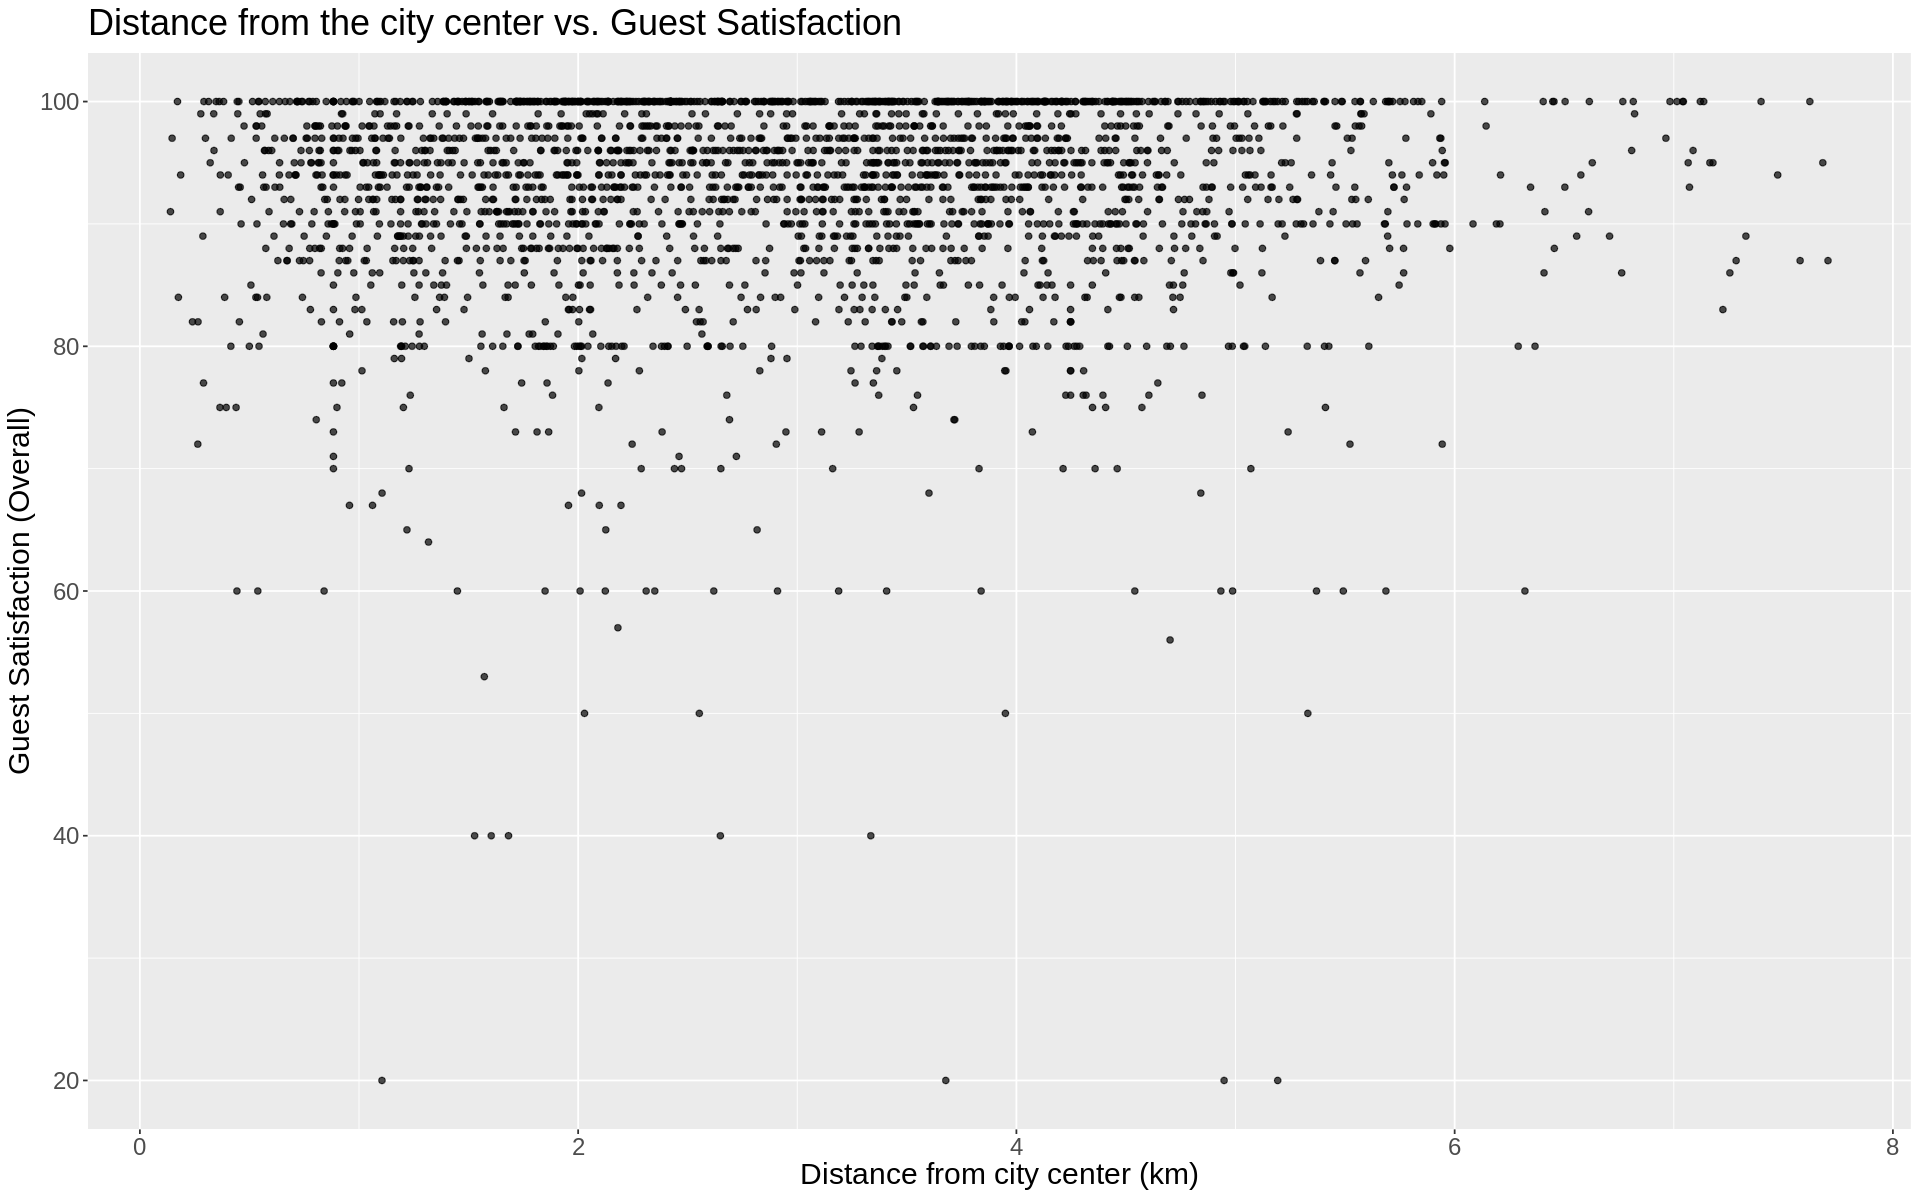

In [11]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(paris_train, aes(x = dist, y = guest_satisfaction_overall)) +
  geom_point(alpha = 0.7) +
  ggtitle("Distance from the city center vs. Guest Satisfaction") +
  labs(x = "Distance from city center (km)", y = "Guest Satisfaction (Overall)") + 
  theme(text = element_text(size = 18))


This example shows that an increase in the distance from the city center generally results in a decrease in guest satisfaction ratings. This is evident from the majority of scatter points being clustered towards the upper-left hand side of the plot.

The next scatter plot compares the distance from the nearest metro station with the Guest Satisfaction ratings. 

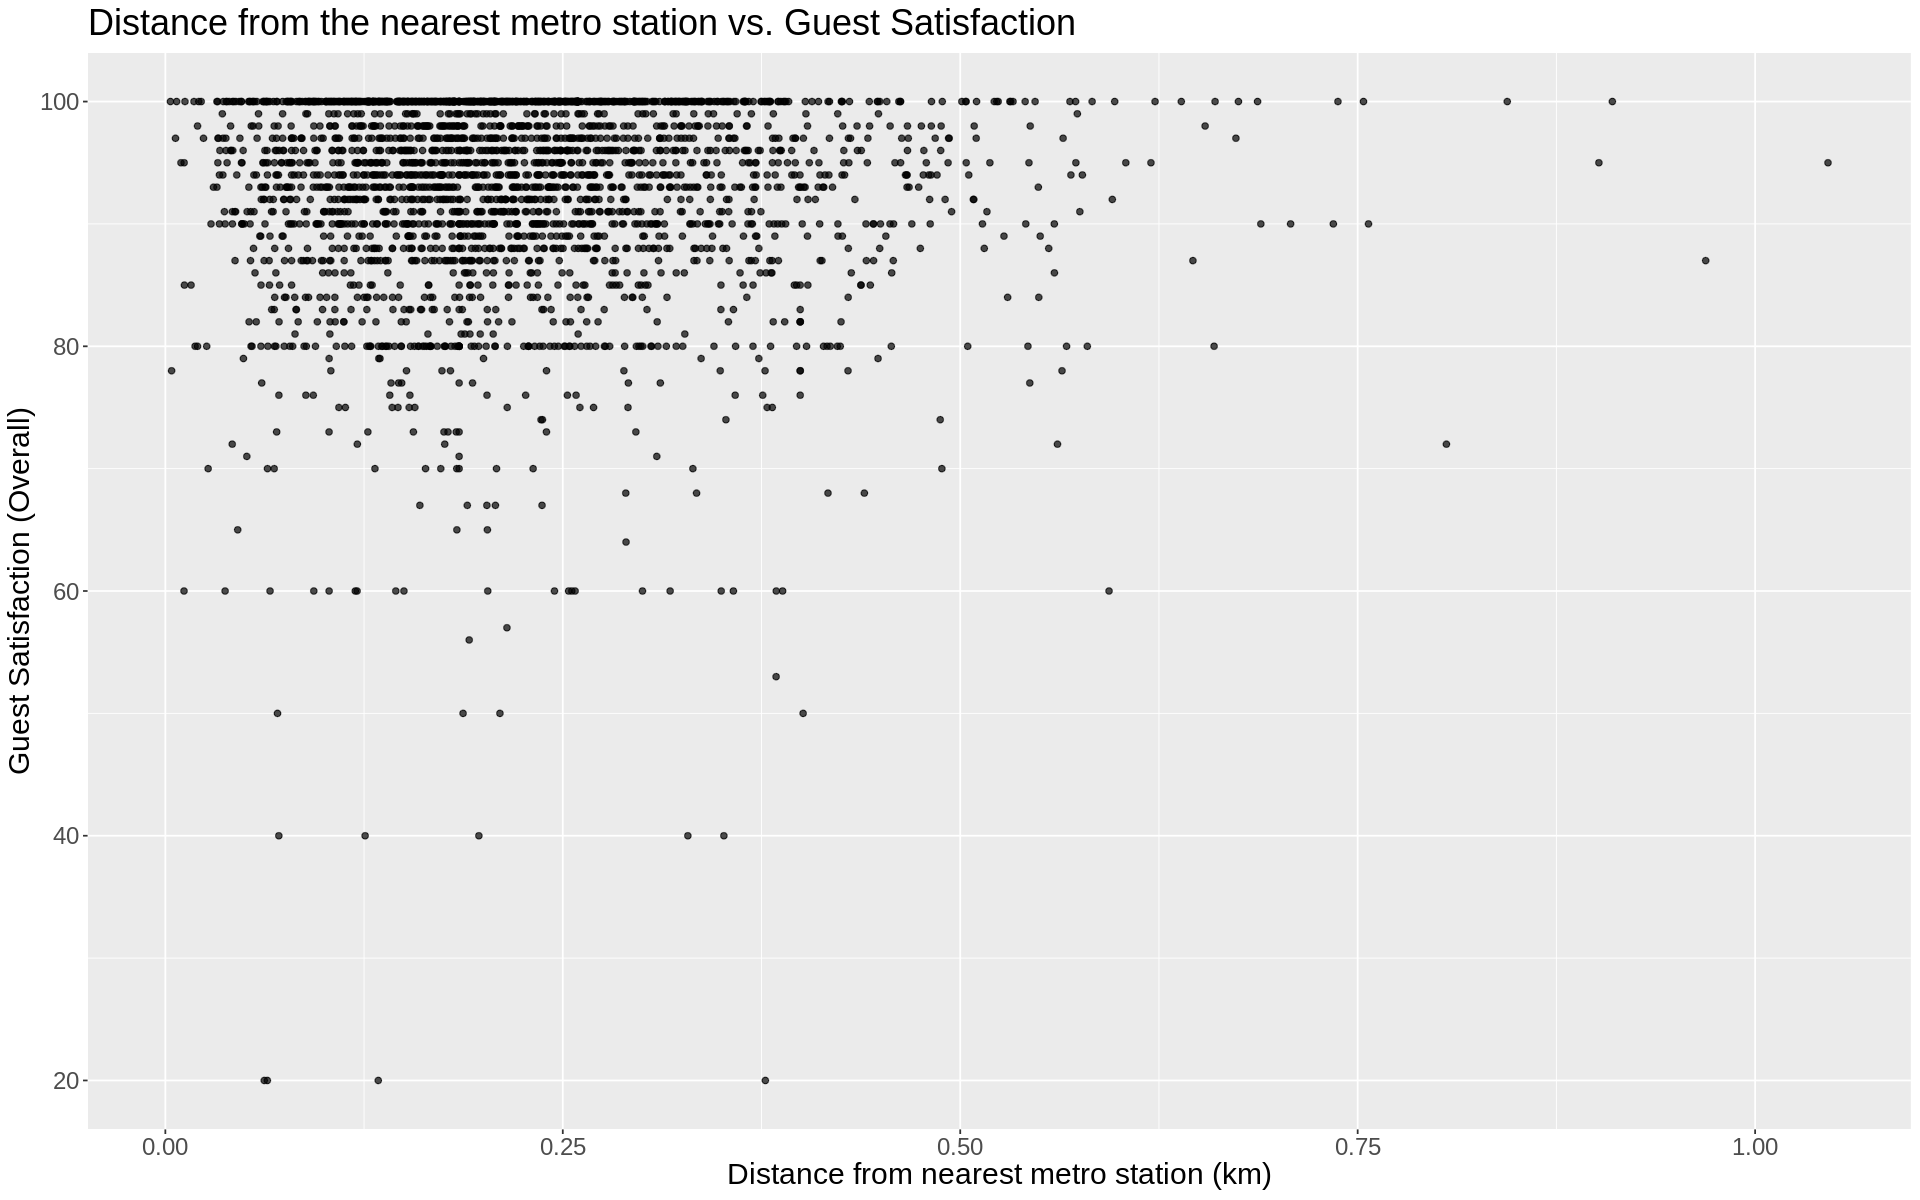

In [12]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(paris_train, aes(x = metro_dist, y = guest_satisfaction_overall)) +
  geom_point(alpha = 0.7) +
  ggtitle("Distance from the nearest metro station vs. Guest Satisfaction") +
  labs(x = "Distance from nearest metro station (km)", y = "Guest Satisfaction (Overall)") + 
  theme(text = element_text(size = 18))


Similarly, this example shows that an increase in the distance from the metro station generally results in a decrease in guest satisfaction ratings. This is evident from the majority of scatter points being clustered towards the upper-left hand side of the plot, with some of the most expensive Airbnbs being located close to a metro station.

### Methods

During our analysis of the factors that affect Airbnb prices, we found several predictor variables that play a role in determining prices, such as location, guest satisfaction score, cleanliness rating, etc. Thus, it would be appropriate to conduct data analysis with all filtered variables in the dataset.

For visualizing the results of the analysis, a scatter plot or heat map can be created with prices as the dependent variable and the most prominent variables as independent variables. This way any trends or patterns that may exist can be more easily visualized. 

### Expected outcomes and significance


#### 1. What do you expect to find?

We hypothesize that the proximity of Airbnb locations to popular attractions and amenities (metro stations) will have a positive impact on guest satisfaction and increase the listing price.

#### 2. What impact could such findings have?
These findings could potentially influence where new Airbnb listings will become available and what these listings include to increase guest satisfaction. This would affect the tourism industry as spending would increase on businesses in higher populated areas of a city. The pricing and marketing strategies of Airbnb's would also be affected if the data support the prediction. Airbnb’s near popular attractions or public transportation can command higher prices for their listings. Those farther away may need to adjust their pricing strategy or marketing approach to remain competitive. It would also affect who can rent the Airbnb, as they will be more expensive. Guests will prioritize listings close to their desired destinations or amenities, further increasing the demand for listings in these areas.

The results of this study could have several implications. Firstly, it could influence the location and amenities included in new Airbnb listings to enhance guest satisfaction and increase revenue. Secondly, it could impact the tourism industry by increasing spending in popular areas of a city. Thirdly, it could affect the pricing and marketing strategies of Airbnb listings, with those closer to popular attractions commanding higher prices. This could potentially limit accessibility for some guests while increasing demand for listings in these areas.
    
#### 3. What future questions could this lead to?
These impacts lead to two questions: 1. This impact allows us to question what businesses will be most affected by increasing tourism, both positively and negatively, and 2. What amenities or attractions are most strongly associated with higher guest satisfaction and pricing in different cities or regions? 

These findings could lead to further research to determine which specific businesses or industries would be most impacted by increased tourism, both positively and negatively. Additionally, future research could investigate the amenities or attractions that are most strongly associated with higher guest satisfaction and pricing in different cities or regions.

#### References:
1. https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?select=paris_weekends.csv 
2. https://www.sciencedirect.com/science/article/pii/S0261517718300785
3. https://www.sciencedirect.com/science/article/pii/S1877916621000424 